In [153]:
library(dplyr)
library(ggplot2)
library(fpp2)
library(forecast)
library(tseries)
library(aTSA)

Installing package into 'C:/Users/usama/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'aTSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\usama\AppData\Local\Temp\Rtmp0owDDe\downloaded_packages



Attaching package: 'aTSA'


The following objects are masked from 'package:tseries':

    adf.test, kpss.test, pp.test


The following object is masked from 'package:forecast':

    forecast


The following object is masked from 'package:graphics':

    identify




In [64]:
data <- read.csv('Departure.csv')

In [65]:
head(data)

,Month,departures..000
,<chr>,<dbl>
1,2010 January,732.4
2,2010 February,757.2
3,2010 March,919.6
4,2010 April,709.5
5,2010 May,977.9
6,2010 June,1183.1


In [66]:
dim(data)

[1] 153   2

In [67]:
data <- data %>% rename('departures' = 'departures..000') 

In [68]:
times <- ts(data$departures, start=c(2010,1), end=c(2022,9), frequency= 12)

In [69]:
times

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,732.4,757.2,919.6,709.5,977.9,1183.1,1269.5,1250.5,1078.7,1045.8,800.7,700.5
2011,729.6,724.0,869.6,987.9,1084.2,1198.5,1288.0,1247.8,1070.3,978.7,774.3,754.3
2012,700.5,706.9,874.8,972.6,1089.6,1222.3,1278.8,1244.2,1122.1,1041.3,804.1,782.4
2013,709.5,698.7,937.3,972.3,1160.2,1292.1,1336.7,1314.3,1144.2,1079.9,836.5,832.7
2014,764.7,742.8,892.5,1112.7,1223.8,1361.8,1418.4,1403.9,1231.2,1179.9,925.4,912.3
2015,861.5,850.3,1063.4,1178.5,1359.9,1541.7,1600.0,1552.5,1368.8,1339.8,1055.4,1018.6
2016,981.7,989.0,1236.5,1282.8,1475.7,1684.6,1738.7,1688.9,1498.6,1462.3,1134.9,1145.3
2017,1057.1,1020.2,1227.7,1438.7,1530.6,1761.5,1828.6,1778.1,1583.6,1505.9,1203.5,1204.3
2018,1115.6,1047.3,1294.6,1473.8,1687.4,1879.0,1932.0,1865.2,1691.0,1624.9,1284.0,1285.7
2019,1169.3,1139.1,1375.4,1622.6,1744.0,1933.4,2006.9,1967.5,1757.4,1660.1,1279.1,1320.2


In [70]:
class(times)

[1] "ts"

In [71]:
typeof(times)

[1] "double"

In [72]:
start(times)

[1] 2010    1

In [73]:
end(times)

[1] 2022    9

In [74]:
frequency(times)

[1] 12

In [75]:
cycle(times)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2010,1,2,3,4,5,6,7,8,9,10,11,12
2011,1,2,3,4,5,6,7,8,9,10,11,12
2012,1,2,3,4,5,6,7,8,9,10,11,12
2013,1,2,3,4,5,6,7,8,9,10,11,12
2014,1,2,3,4,5,6,7,8,9,10,11,12
2015,1,2,3,4,5,6,7,8,9,10,11,12
2016,1,2,3,4,5,6,7,8,9,10,11,12
2017,1,2,3,4,5,6,7,8,9,10,11,12
2018,1,2,3,4,5,6,7,8,9,10,11,12
2019,1,2,3,4,5,6,7,8,9,10,11,12


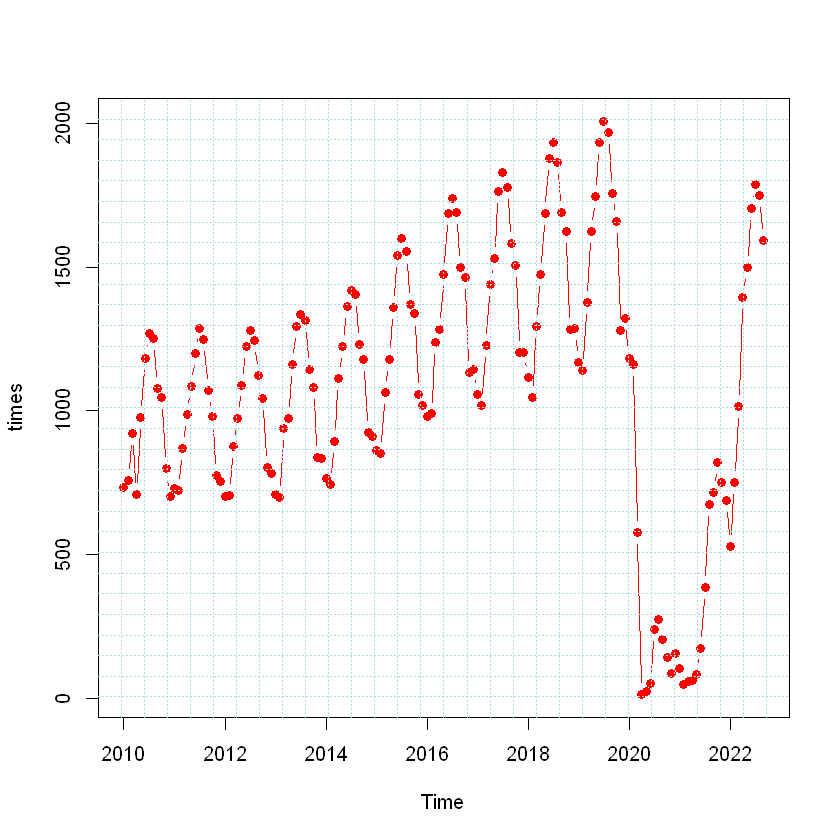

In [76]:
plot(times, pch=16, type='b', col='red')
grid(, col='lightblue', nx=30) #seasonality exists

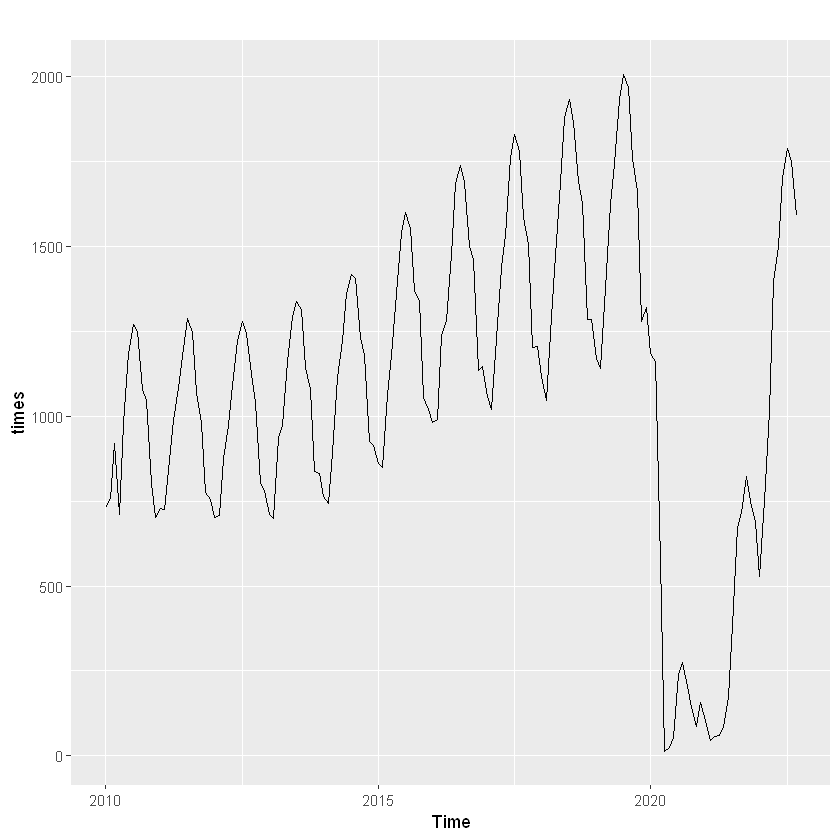

In [77]:
autoplot(times)

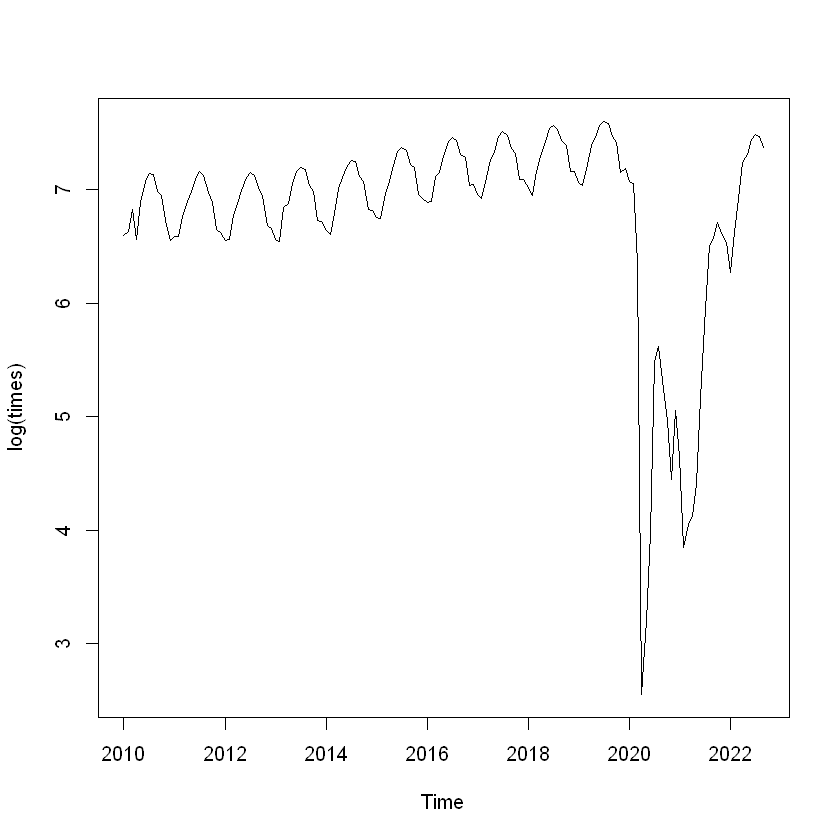

In [78]:
plot(log(times))
#here we can see that the data has slight upward trend till 2019

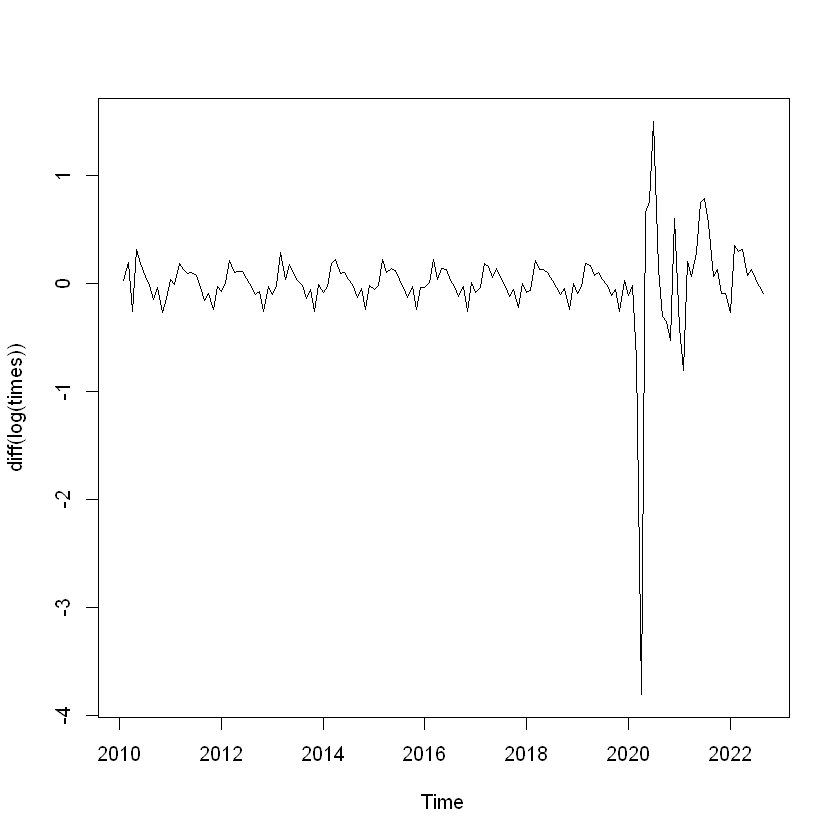

In [79]:
plot(diff(log(times)))
#here the mean is now constant over time and series is stationary

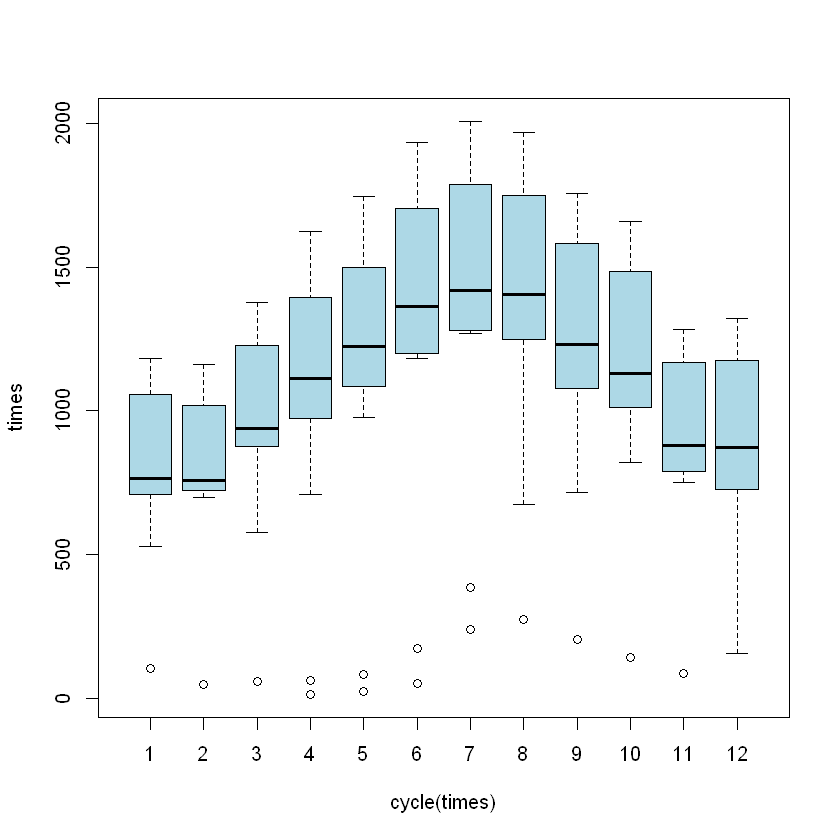

In [80]:
boxplot(times~cycle(times), col='lightblue')
#checking seasonality
# here we can see that most of the departures occurs at 7 and 8 months while the less departures occur at 1 and 2 months over 
# the years

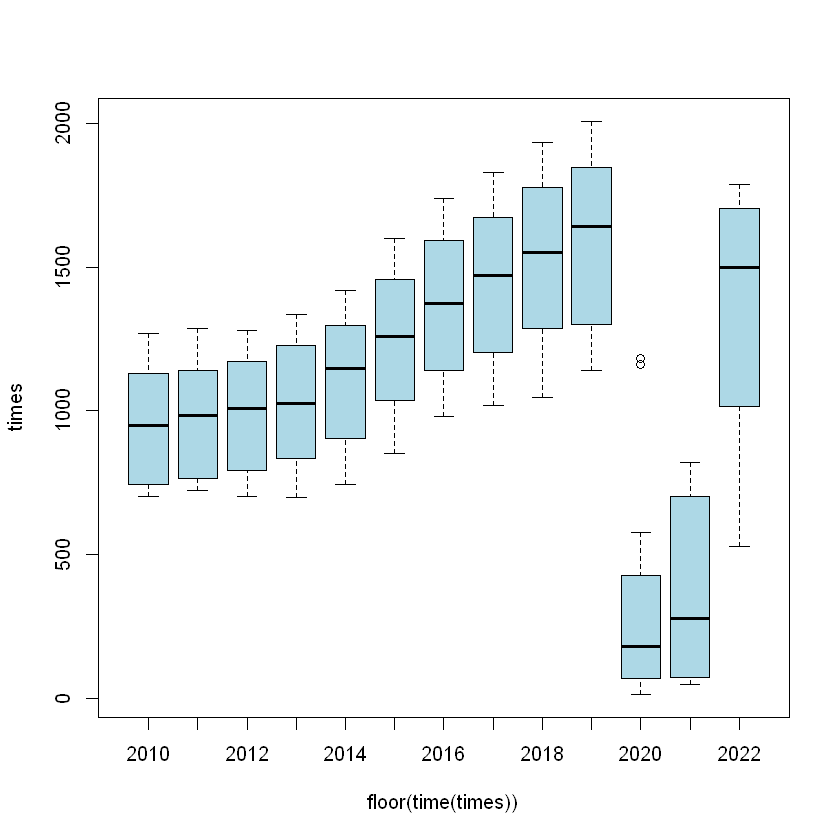

In [81]:
boxplot(times~floor(time(times)), col='lightblue')

In [82]:
APLinMod <- lm(times~time(times))

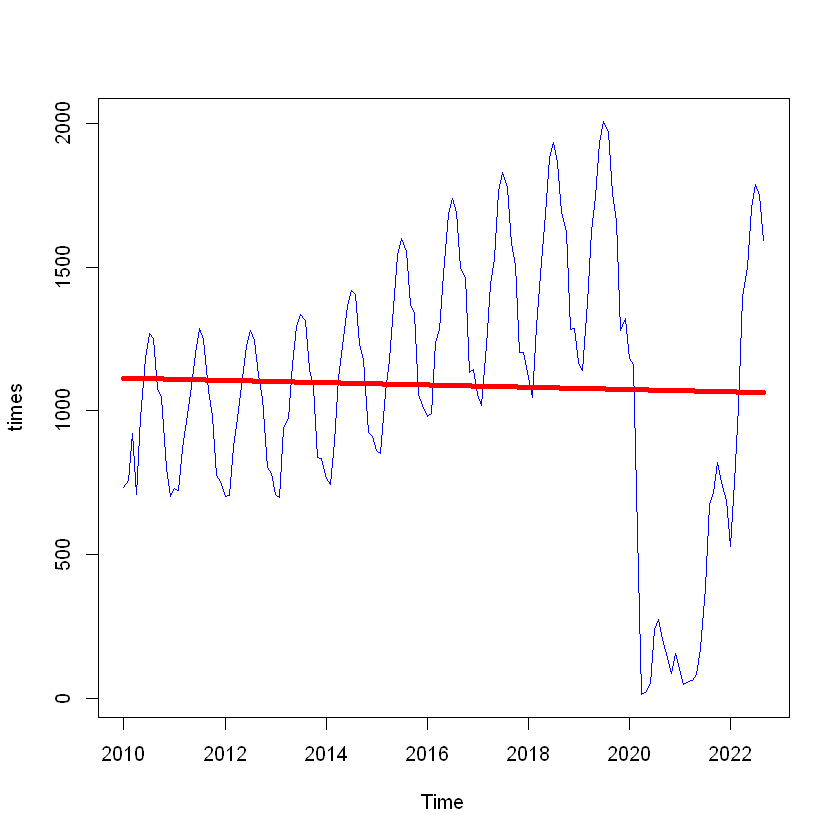

In [83]:
plot(times, col='blue')
x <- as.vector(time(times))
y <- predict.lm(APLinMod)
lines(x, y, col='red', lw=4)

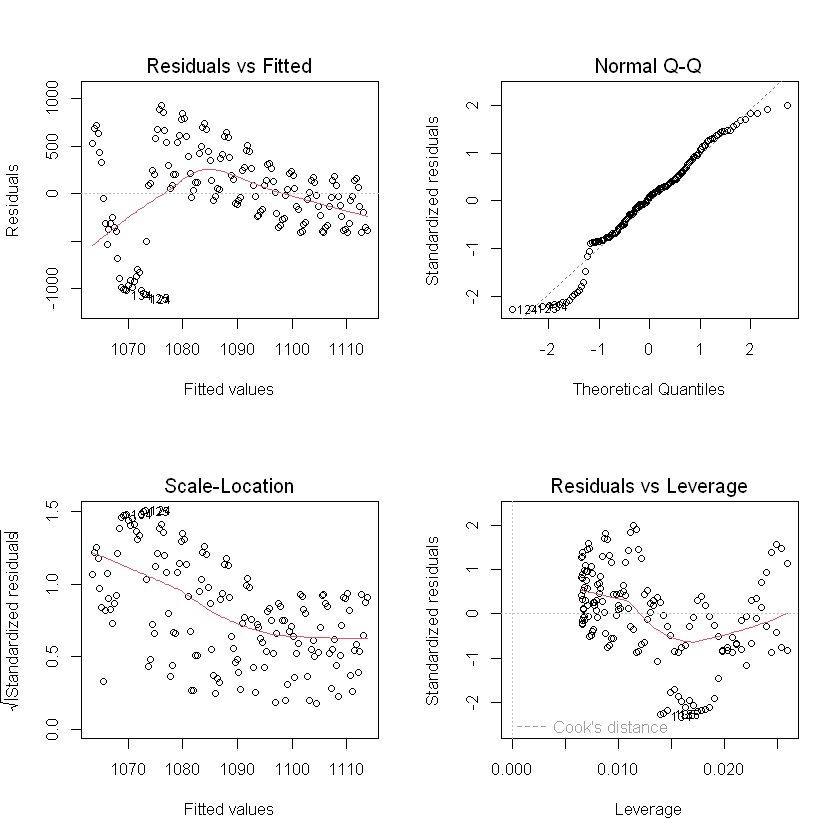

In [84]:
par(mfrow=c(2,2))
plot(APLinMod)

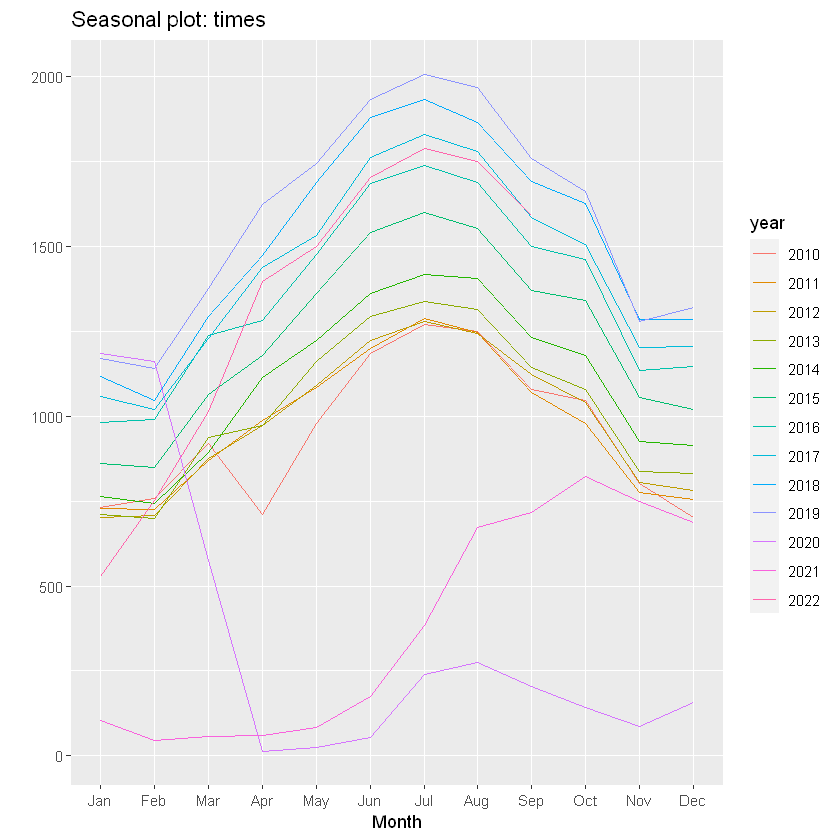

In [85]:
ggseasonplot(times)

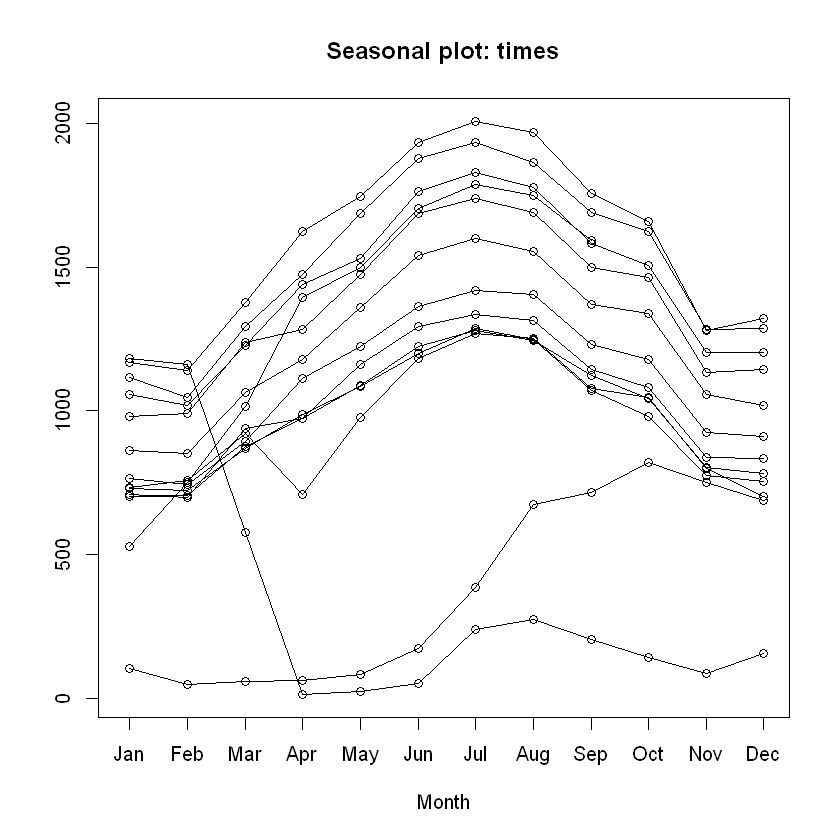

In [86]:
seasonplot(times)

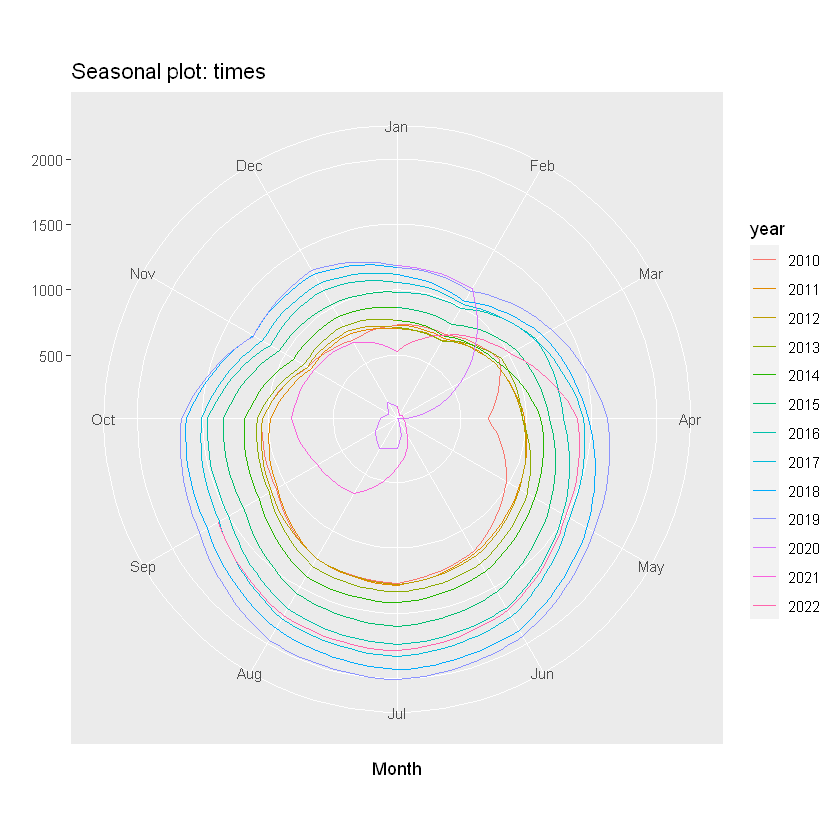

In [87]:
ggseasonplot(times, polar=TRUE)

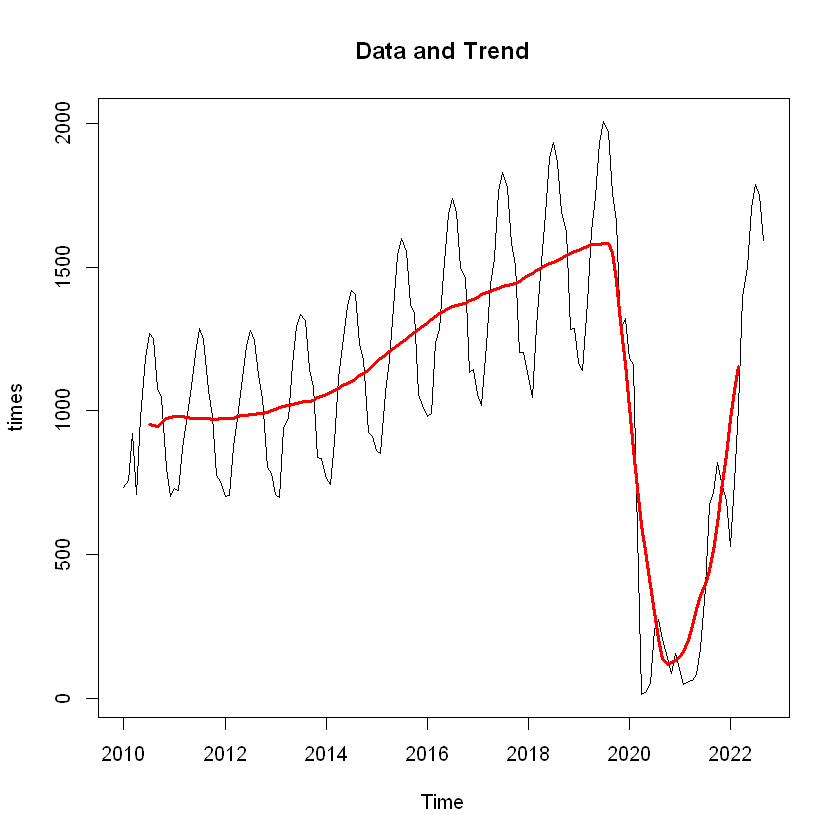

In [88]:
plot(times, main='Data and Trend')
x <- as.vector(time(times))
y <- ma(times, order=12)
lines(x, y, col='red', lw=3)

In [89]:
fit.add <- decompose(times, type='additive')

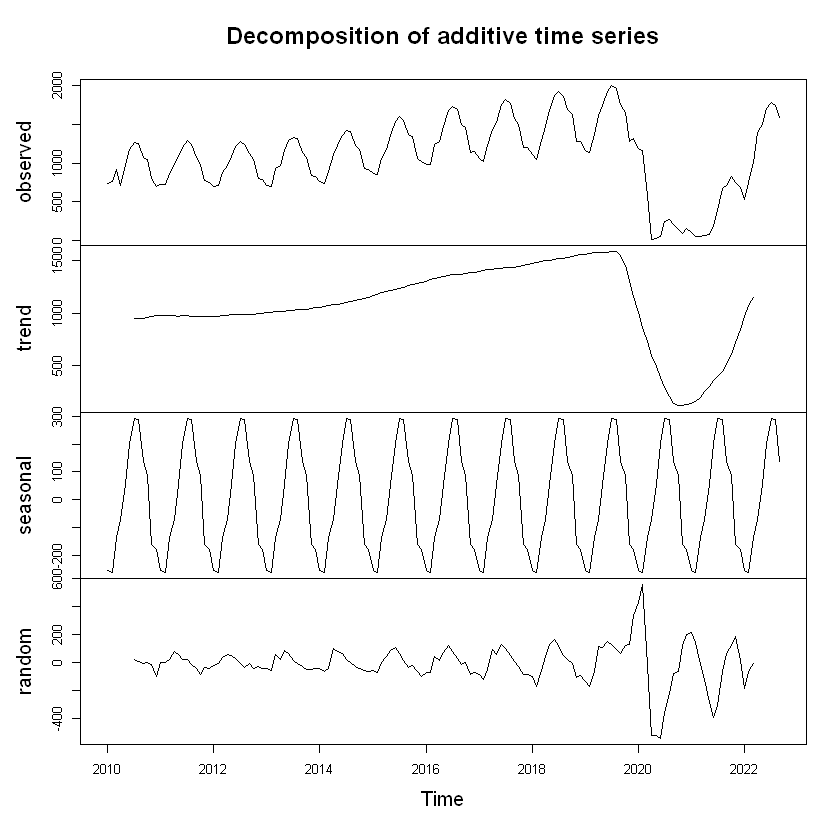

In [90]:
plot(fit.add)

In [91]:
fit.mult <- decompose(times, type='multiplicative')

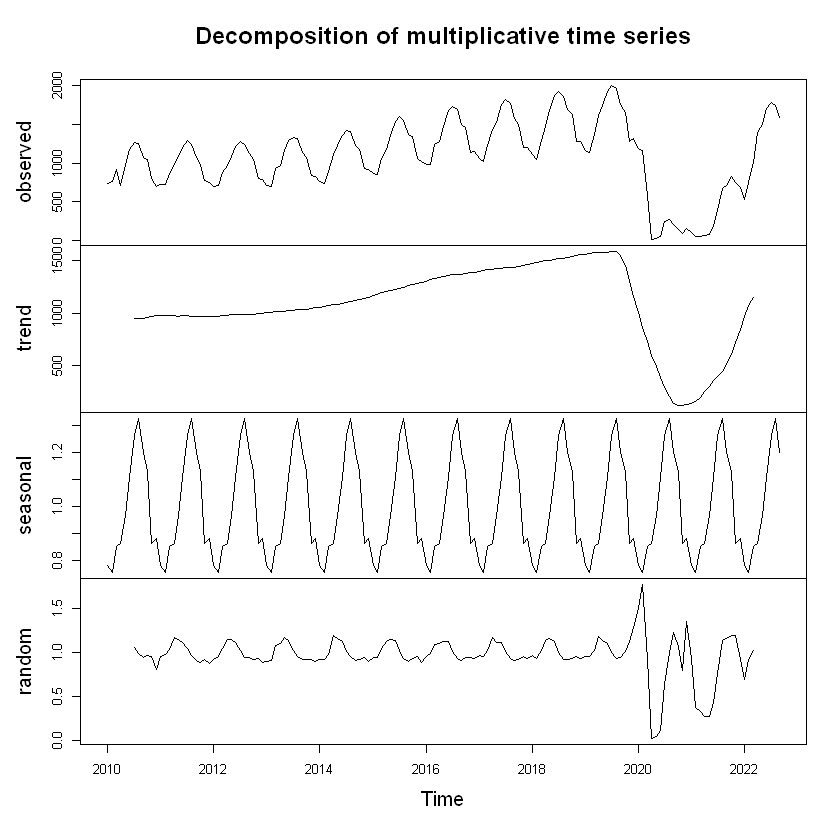

In [92]:
plot(fit.mult)

In [93]:
fit.stl <- stl(times, 
               t.window=13, s.window="periodic", robust=TRUE)

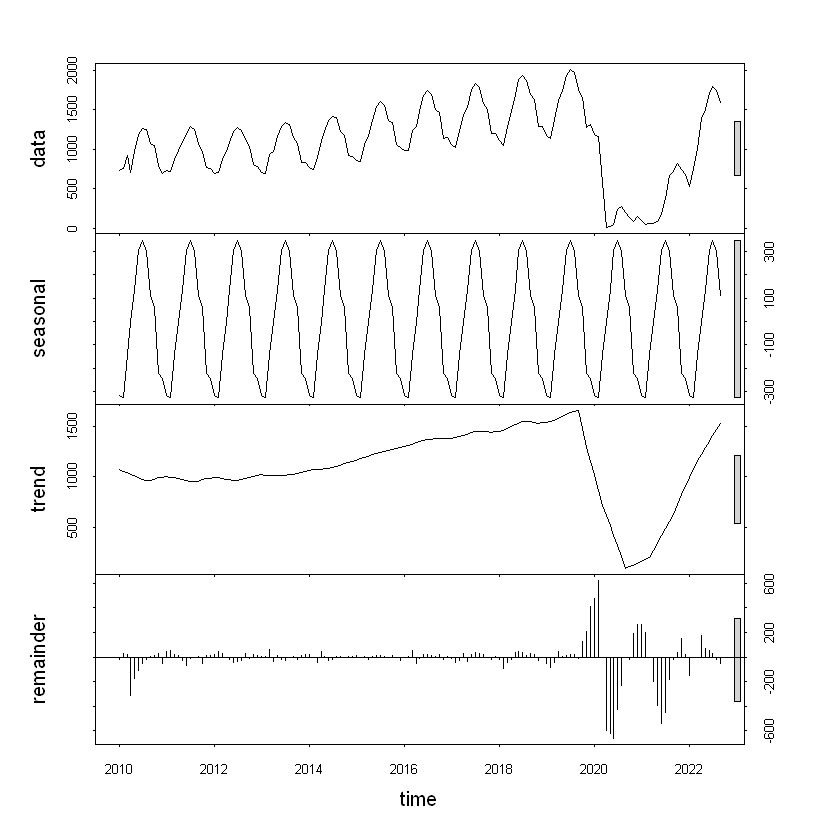

In [94]:
plot(fit.stl)

In [95]:
#Naive model
ntrain <- window(times, end = c(2020,12))
ntest <- window(times, start = c(2021,1), end= c(2021,6))
nvm <- naive(ntrain, h = 132)

summary(nvm)


Forecast method: Naive method

Model Information:
Call: naive(y = ntrain, h = 132) 

Residual sd: 159.5276 

Error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE      ACF1
Training set -4.399237 159.5276 121.7656 -34.04558 46.6151 0.6312399 0.4252624

Forecasts:
         Point Forecast       Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021          156.1   -48.34283  360.5428  -156.5683  468.7683
Feb 2021          156.1  -133.02583  445.2258  -286.0798  598.2798
Mar 2021          156.1  -198.00537  510.2054  -385.4574  697.6574
Apr 2021          156.1  -252.78566  564.9857  -469.2367  781.4367
May 2021          156.1  -301.04807  613.2481  -543.0476  855.2476
Jun 2021          156.1  -344.68062  656.8806  -609.7779  921.9779
Jul 2021          156.1  -384.80489  697.0049  -671.1426  983.3426
Aug 2021          156.1  -422.15165  734.3517  -728.2596 1040.4596
Sep 2021          156.1  -457.22849  769.4285  -781.9050 1094.1050
Oct 2021          156.1  -490.4050

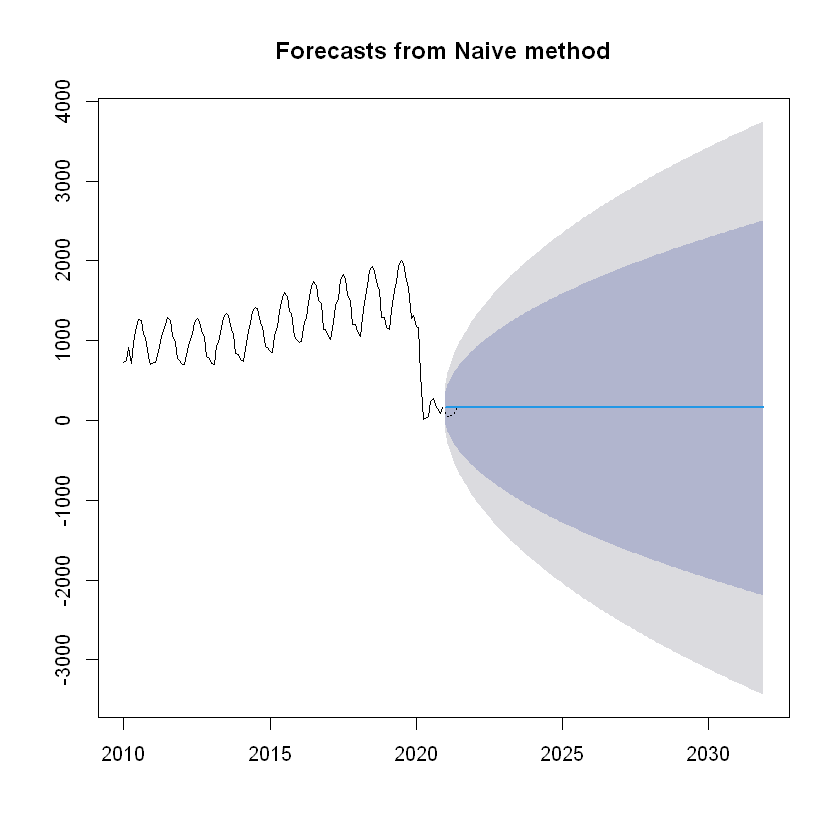

In [96]:
plot(nvm)
lines(ntest, lty=3)

In [97]:
accuracy(nvm, ntest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-4.399237,159.52759,121.76565,-34.04558,46.6151,0.6312399,0.42526240,NA
Test set,-68.283333,80.74768,74.48333,-114.71792,118.2669,0.3861257,0.09391888,2.37296


# Exponential Smoothing Models

In [98]:
train <- window(diff(log(times)), end = c(2020,12))
test <- window(diff(log(times)), start = c(2021,1), end= c(2021,6))

In [99]:
length(train)

[1] 131

In [100]:
#brown simple exponential smoothing ETS(ANN)
brown <- ses(train, h=131)

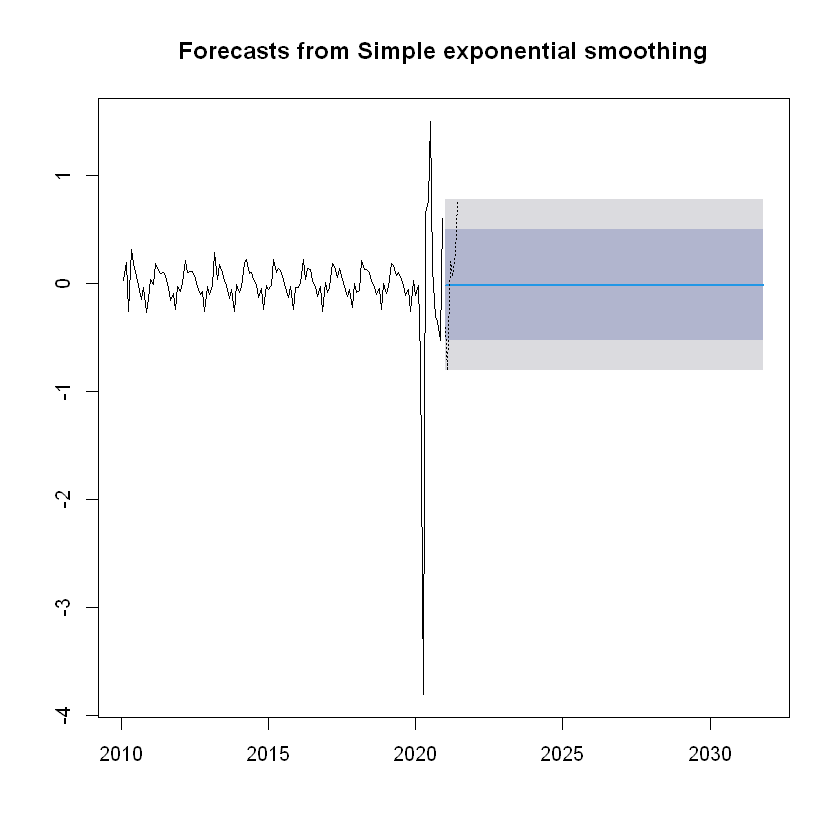

In [101]:
plot(brown)
lines(test, lty=3)

In [102]:
accuracy(brown)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-8.38413e-05,0.4013815,0.1641784,113.0475,116.4865,1.536343,0.1240439


In [103]:
accuracy(brown, test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0000838413,0.4013815,0.1641784,113.0475,116.4865,1.536343,0.1240439,NA
Test set,0.0305862865,0.5013874,0.4249545,104.0811,104.0811,3.976625,0.2765283,1.36986


In [104]:
forecast(brown, h=6)

         Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021    -0.01182405 -0.5301874 0.5065393 -0.8045924 0.7809443
Feb 2021    -0.01182405 -0.5301874 0.5065393 -0.8045924 0.7809443
Mar 2021    -0.01182405 -0.5301874 0.5065393 -0.8045924 0.7809443
Apr 2021    -0.01182405 -0.5301874 0.5065393 -0.8045924 0.7809443
May 2021    -0.01182405 -0.5301874 0.5065393 -0.8045924 0.7809443
Jun 2021    -0.01182405 -0.5301874 0.5065393 -0.8045924 0.7809443

In [105]:
#Holt exponential method
htrain <- window(times, end = c(2020,12))
htest <- window(times, start = c(2021,1), end= c(2021,6))

In [106]:
holt <- ses(htrain, h=131)

In [178]:
holt

         Point Forecast       Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021       156.0929   -49.17071  361.3565  -157.8307  470.0165
Feb 2021       156.0929  -134.17916  446.3650  -287.8399  600.0257
Mar 2021       156.0929  -199.41038  511.5962  -387.6025  699.7882
Apr 2021       156.0929  -254.40351  566.5893  -471.7072  783.8930
May 2021       156.0929  -302.85374  615.0395  -545.8054  857.9912
Jun 2021       156.0929  -346.65628  658.8421  -612.7956  924.9814
Jul 2021       156.0929  -386.93698  699.1228  -674.3996  986.5854
Aug 2021       156.0929  -424.42943  736.6152  -731.7394 1043.9252
Sep 2021       156.0929  -459.64316  771.8289  -785.5941 1097.7799
Oct 2021       156.0929  -492.94917  805.1350  -836.5313 1148.7171
Nov 2021       156.0929  -524.62755  836.8133  -884.9792 1197.1650
Dec 2021       156.0929  -554.89588  867.0817  -931.2706 1243.4564
Jan 2022       156.0929  -583.92721  896.1130  -975.6702 1287.8560
Feb 2022       156.0929  -611.86184  924.0476 -1018.3925 1330.

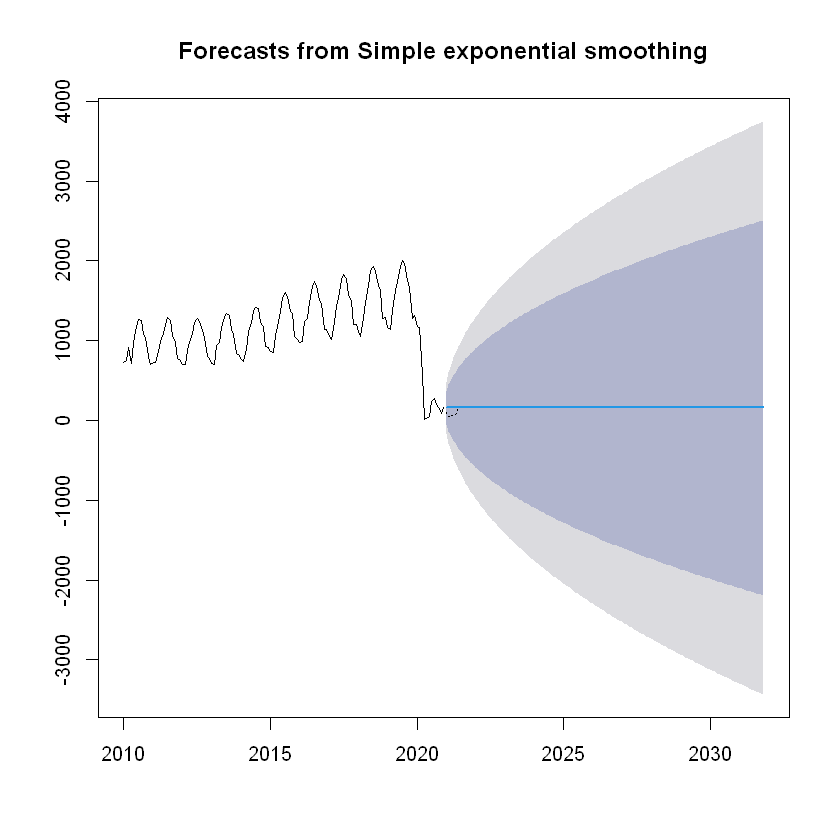

In [107]:
plot(holt)
lines(htest, lty=3)

In [108]:
accuracy(holt, htest)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-4.591731,158.95002,121.0752,-33.82374,46.29513,0.6276607,0.42505005,NA
Test set,-68.276230,80.74168,74.4786,-114.70815,118.25845,0.3861012,0.09391888,2.372786


In [109]:
forecast(holt, h=6)

         Point Forecast      Lo 80    Hi 80     Lo 95    Hi 95
Jan 2021       156.0929  -49.17071 361.3565 -157.8307 470.0165
Feb 2021       156.0929 -134.17916 446.3650 -287.8399 600.0257
Mar 2021       156.0929 -199.41038 511.5962 -387.6025 699.7882
Apr 2021       156.0929 -254.40351 566.5893 -471.7072 783.8930
May 2021       156.0929 -302.85374 615.0395 -545.8054 857.9912
Jun 2021       156.0929 -346.65628 658.8421 -612.7956 924.9814

In [110]:
#Holt-Winter’s Seasonal Method
fittimes <- ets(htrain, model='AAA')
fittimes

ETS(A,Ad,A) 

Call:
 ets(y = htrain, model = "AAA") 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 0.1413 
    gamma = 1e-04 
    phi   = 0.8 

  Initial states:
    l = 962.4632 
    b = 4.7834 
    s = -208.2974 -202.7917 72.2755 130.9762 307.6094 349.7194
           233.3971 73.3278 -65.9956 -144.2698 -278.4757 -267.4752

  sigma:  107.7625

     AIC     AICc      BIC 
1897.832 1903.886 1949.723 

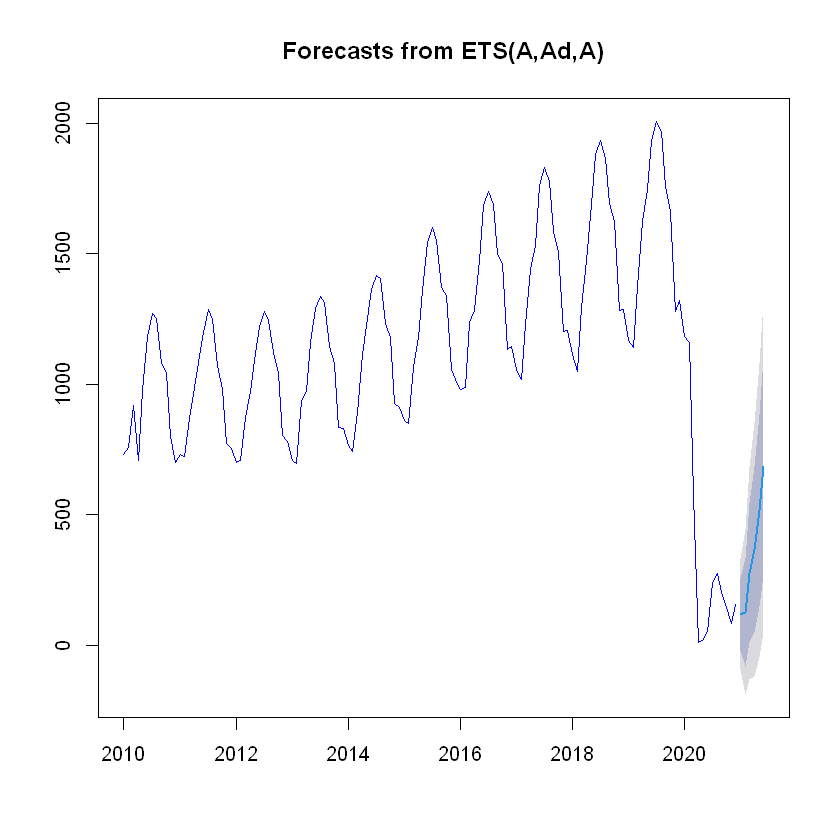

In [111]:
plot(forecast(fittimes, h=6), col='blue')

In [112]:
forecast(fittimes, h=6)

         Point Forecast     Lo 80     Hi 80      Lo 95     Hi 95
Jan 2021       120.1400 -17.96313  258.2432  -91.07053  331.3506
Feb 2021       127.7165 -78.91624  334.3493 -188.30103  443.7341
Mar 2021       276.7834  11.60873  541.9580 -128.76624  682.3329
Apr 2021       366.9147  48.54473  685.2846 -119.99014  853.8195
May 2021       515.7952 147.98794  883.6024  -46.71744 1078.3078
Jun 2021       683.4642 269.21589 1097.7125   49.92609 1317.0023

In [113]:
accuracy(fittimes) #final model

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.425368,100.5841,52.8242,-30.07175,41.14341,0.2738436,0.2759947


In [114]:
# Exponential Model of multiplicative
fittimes2 <- ets(htrain, model='MAM')
fittimes2

ETS(M,Ad,M) 

Call:
 ets(y = htrain, model = "MAM") 

  Smoothing parameters:
    alpha = 0.4842 
    beta  = 6e-04 
    gamma = 0.2862 
    phi   = 0.973 

  Initial states:
    l = 951.589 
    b = 0.8685 
    s = 0.767 0.8447 1.0771 1.1397 1.2272 1.2824
           1.216 1.0648 0.9518 0.908 0.7703 0.751

  sigma:  0.1798

     AIC     AICc      BIC 
2047.192 2053.245 2099.082 

In [115]:
forecast(fittimes2, h=6)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2021       118.3857 91.11220 145.6593 76.67446 160.0970
Feb 2021       114.3870 84.96877 143.8052 69.39571 159.3783
Mar 2021       115.6713 83.05141 148.2912 65.78349 165.5591
Apr 2021       113.5084 78.85078 148.1660 60.50415 166.5126
May 2021       124.9126 84.00647 165.8187 62.35210 187.4730
Jun 2021       144.1354 93.87991 194.3910 67.27624 220.9947

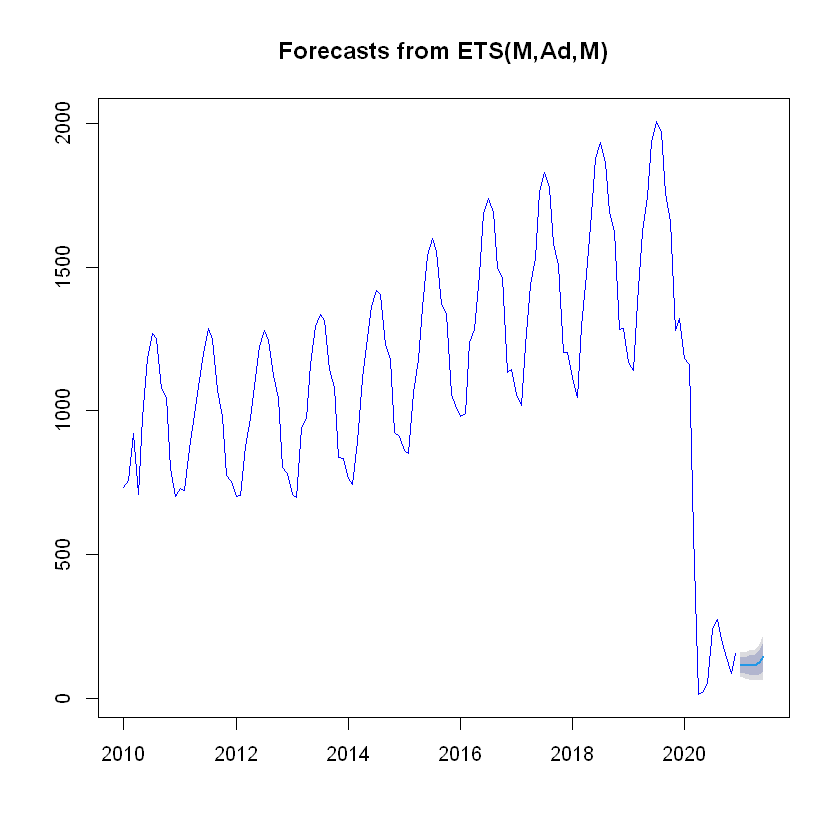

In [116]:
plot(forecast(fittimes2, h=6), col='blue')

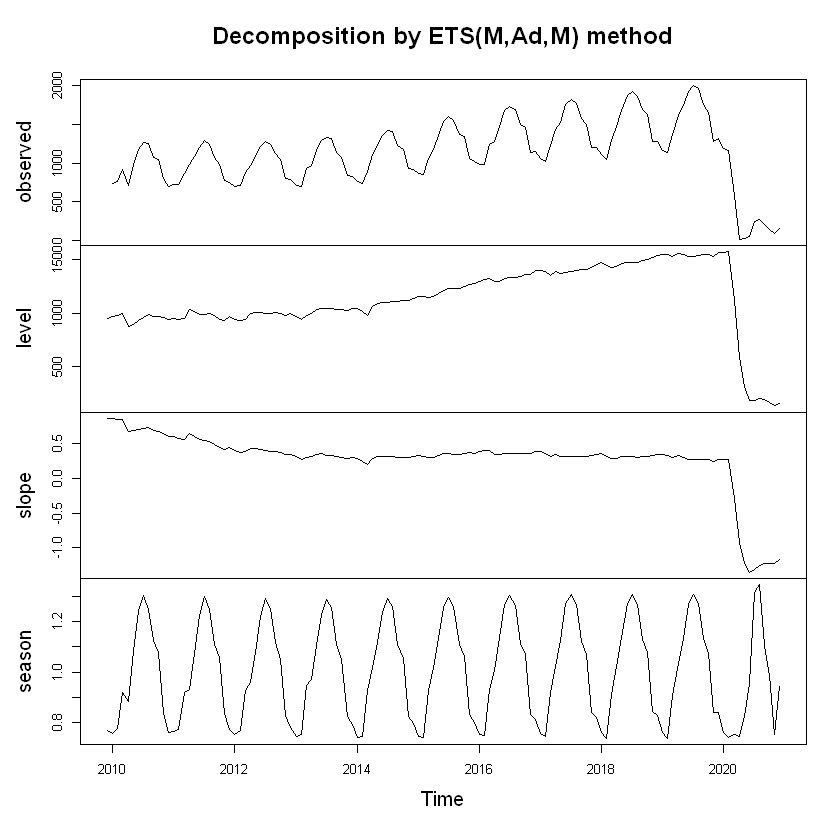

In [117]:
plot(fittimes2)

In [118]:
accuracy(fittimes2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-13.36338,146.3111,54.91991,-93.07826,97.21674,0.2847079,0.6748809


In [119]:
# fcast.randomwalk<-rwf(htrain, h=6, drift = TRUE)
# summary(fcast.randomwalk)

In [120]:
# htrain %>% tsCV(forecastfunction =rwf, drift=TRUE, h=1) ->e
# e^2 %>% mean(na.rm=TRUE) %>% sqrt()

# ARIMA MODELS

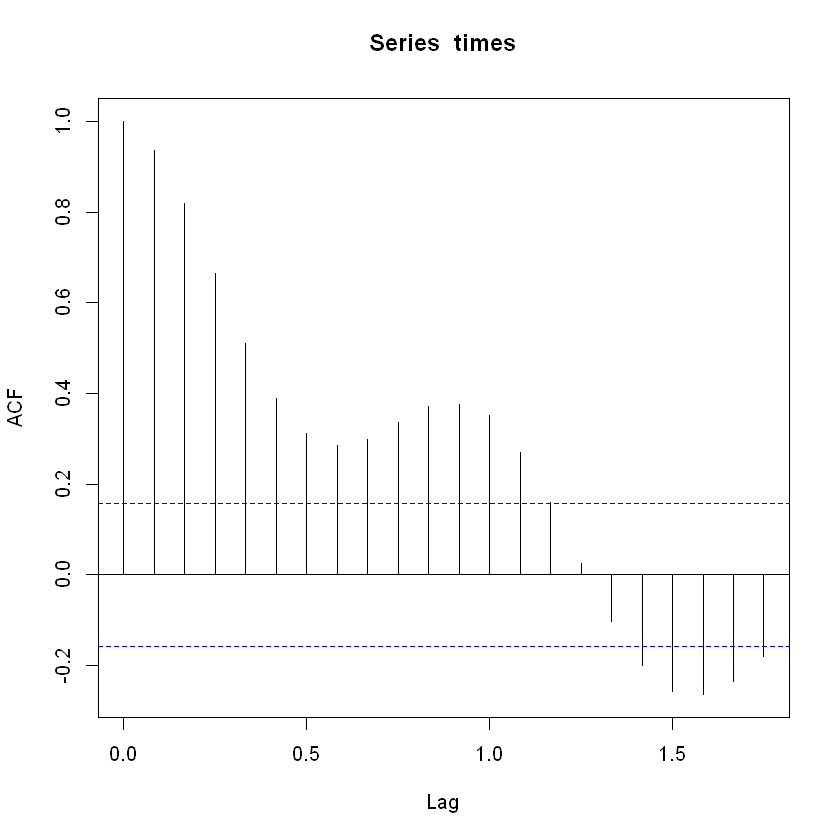

In [121]:
acf(times) #as we can see that corealation exists here and is not stationary STATIONARY TEST

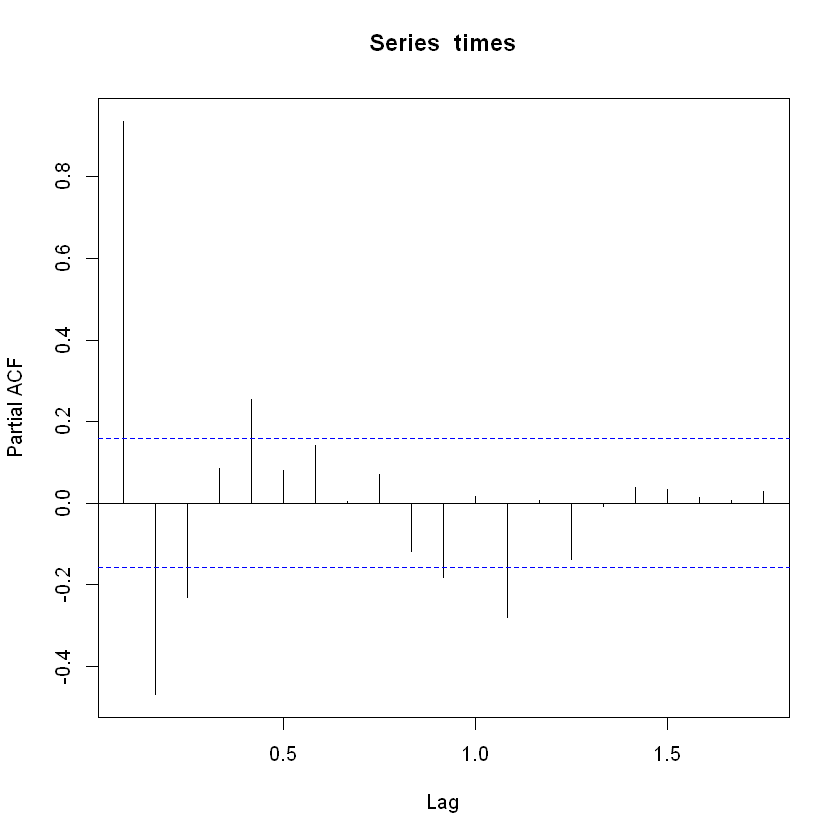

In [122]:
pacf(times)

In [125]:
adf.test(times) #here we can see that p value in not less than 0.05


	Augmented Dickey-Fuller Test

data:  times
Dickey-Fuller = -2.2493, Lag order = 5, p-value = 0.4725
alternative hypothesis: stationary


In [127]:
ttimes <- diff(log(times))

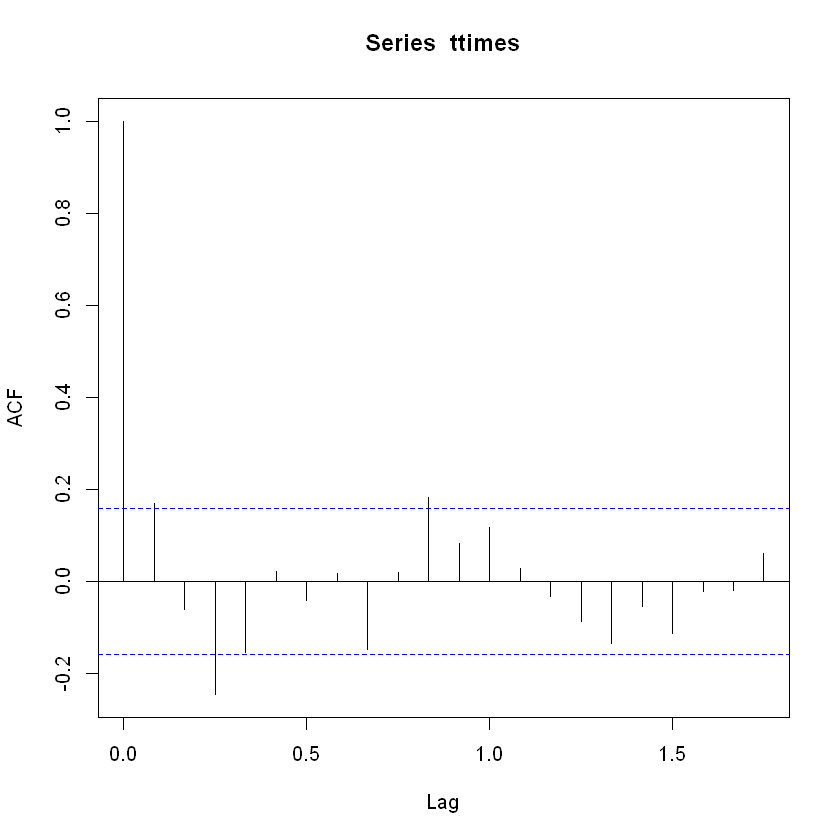

In [128]:
acf(ttimes)

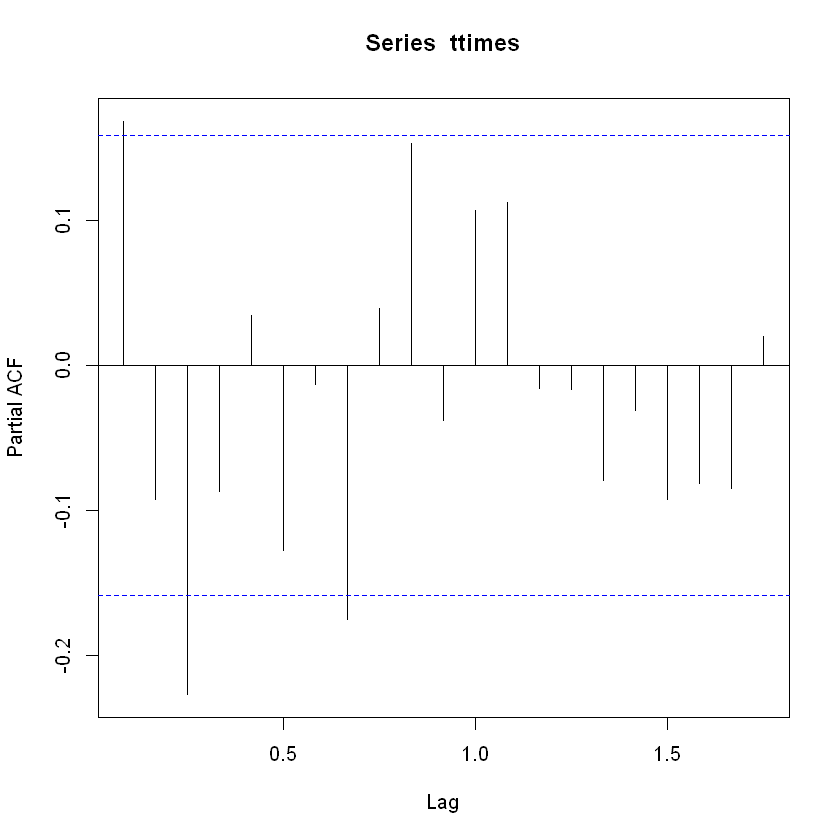

In [130]:
pacf(ttimes)

In [131]:
adf.test(ttimes)

Warning message in adf.test(ttimes):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  ttimes
Dickey-Fuller = -6.219, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


In [138]:
artrain <- window(ttimes, end = c(2020,12))
artest <- window(ttimes, start = c(2021,1), end= c(2021,6))

In [139]:
armodel <- auto.arima(artrain, ic="aic", trace=TRUE) #124 AIC


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : 129.212
 ARIMA(0,0,0)            with non-zero mean : 136.584
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : 136.3811
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : 136.6627
 ARIMA(0,0,0)            with zero mean     : 134.6972
 ARIMA(2,0,2)(0,0,1)[12] with non-zero mean : 129.3082
 ARIMA(2,0,2)(1,0,0)[12] with non-zero mean : 128.1965
 ARIMA(2,0,2)            with non-zero mean : 129.1532
 ARIMA(2,0,2)(2,0,0)[12] with non-zero mean : 129.487
 ARIMA(2,0,2)(2,0,1)[12] with non-zero mean : 131.2112
 ARIMA(1,0,2)(1,0,0)[12] with non-zero mean : 130.3414
 ARIMA(2,0,1)(1,0,0)[12] with non-zero mean : 127.49
 ARIMA(2,0,1)            with non-zero mean : 128.1131
 ARIMA(2,0,1)(2,0,0)[12] with non-zero mean : 128.9303
 ARIMA(2,0,1)(1,0,1)[12] with non-zero mean : 128.7011
 ARIMA(2,0,1)(0,0,1)[12] with non-zero mean : 128.3316
 ARIMA(2,0,1)(2,0,1)[12] with non-zero mean : 130.6998
 ARIMA(1,0,1)(1,0,0)[12] with non-zero mean : 137.9615
 ARIMA(2,0,0)(

In [140]:
armodel

Series: artrain 
ARIMA(3,0,0)(1,0,0)[12] with zero mean 

Coefficients:
         ar1      ar2      ar3    sar1
      0.0986  -0.0906  -0.3135  0.3763
s.e.  0.0834   0.0840   0.0830  0.1793

sigma^2 = 0.1404:  log likelihood = -56.35
AIC=122.7   AICc=123.18   BIC=137.07

In [141]:
armodelforecast <- forecast(armodel, h=6)

In [143]:
armodelforecast

         Point Forecast      Lo 80       Hi 80      Lo 95      Hi 95
Jan 2021     0.15845080 -0.3216727  0.63857432 -0.5758348  0.8927364
Feb 2021     0.09233765 -0.3901137  0.57478900 -0.6455080  0.8301833
Mar 2021    -0.45905831 -0.9430705  0.02495386 -1.1992910  0.2811744
Apr 2021    -1.52289024 -2.0322361 -1.01354435 -2.3018676 -0.7439129
May 2021     0.22493195 -0.2851270  0.73499088 -0.5551359  1.0049998
Jun 2021     0.35506782 -0.1555504  0.86568604 -0.4258554  1.1359910

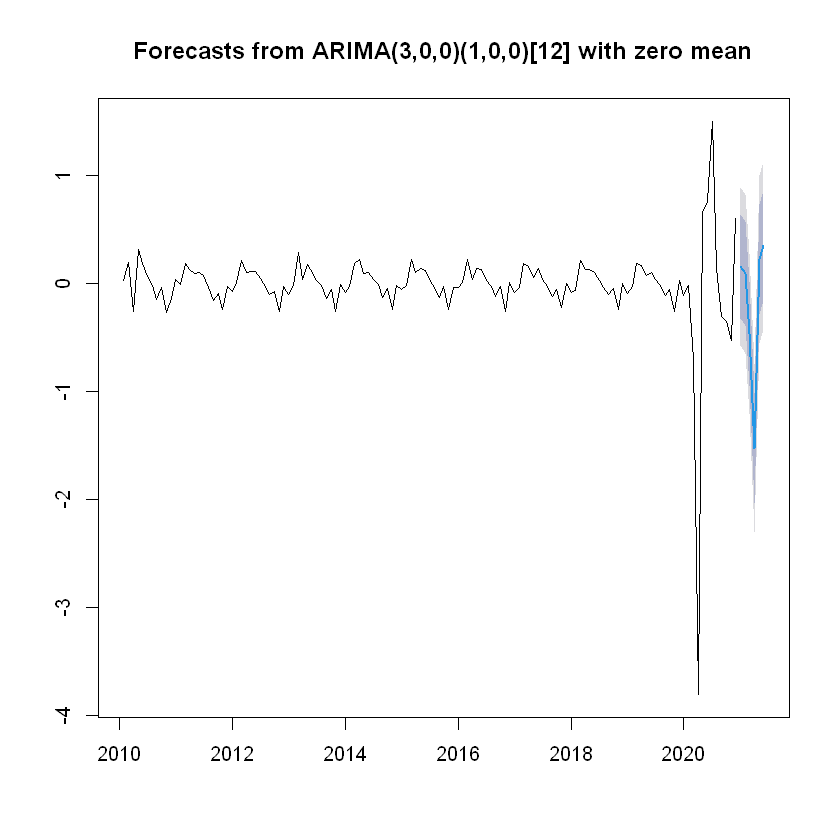

In [144]:
plot(armodelforecast)

In [148]:
Box.test(armodelforecast$resid, lag=20, type="Ljung-Box") 
#The Box-Ljung test assumes the null-hypothesis that the autocorrelations are zero

# VALIDATION TEST: here we can see that pvalue is greater than 0.05 means there is no correlation exists 


	Box-Ljung test

data:  armodelforecast$resid
X-squared = 6.7647, df = 20, p-value = 0.9974


In [177]:
accuracy(armodelforecast)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.01691782,0.3688783,0.1259018,47.98806,121.409,1.17816,-0.03295775


In [156]:
armodel2 <- arima(artrain, order=c(0,0,0))

In [158]:
armodel2


Call:
arima(x = artrain, order = c(0, 0, 0))

Coefficients:
      intercept
        -0.0118
s.e.     0.0351

sigma^2 estimated as 0.1611:  log likelihood = -66.29,  aic = 136.58

In [163]:
Box.test(armodel2$residual, type='Ljung')


	Box-Ljung test

data:  armodel2$residual
X-squared = 2.0623, df = 1, p-value = 0.151


In [165]:
armodel3 <- arima(artrain, order=c(2,0,1))

In [166]:
armodel3


Call:
arima(x = artrain, order = c(2, 0, 1))

Coefficients:
         ar1      ar2      ma1  intercept
      0.8911  -0.2854  -0.8128    -0.0123
s.e.  0.1268   0.0875   0.1085     0.0162

sigma^2 estimated as 0.1438:  log likelihood = -59.06,  aic = 128.11

In [171]:
Box.test(armodel3$residual, type='Ljung')


	Box-Ljung test

data:  armodel3$residual
X-squared = 0.097871, df = 1, p-value = 0.7544


In [172]:
accuracy(armodel3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.002124223,0.3792564,0.1582291,125.9098,219.7326,0.7808735,-0.02702318
